## XG Boost

I will now test XG Boost. XG boost generally outperforms Random Forests on tabular data and provides advantages as well such as countering overfitting, performing better on class imbalance, which is critical in our data.

In [11]:
!pip install xgboost
import pandas as pd
import numpy as np

In [12]:
creditcards = pd.read_csv("~/credit-card-fraud-detection-xgboost/data/creditcards_cleaned.csv")
correlations = creditcards.corr()['Class'].drop('Class')
most_correlated = correlations.abs().sort_values(ascending=False)

In [13]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, average_precision_score

# use all of the features as XGB counters overfitting well 
X = creditcards.drop('Class', axis=1)
y = creditcards['Class']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)


In [14]:
# Calculate scale_pos_weight (helps with class imbalance)
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

# Set up XGBoost classifier
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=scale_pos_weight,  
    n_estimators=500, # adjusted this after observing that higher numbers of estimators were more successful 
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=1
)

# Train model
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=1, num_parallel_tree=None, ...)

In [15]:
# Predictions
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]

# Metrics
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("AUPRC Score:", average_precision_score(y_test, y_proba))

[[85281    14]
 [   30   118]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.89      0.80      0.84       148

    accuracy                           1.00     85443
   macro avg       0.95      0.90      0.92     85443
weighted avg       1.00      1.00      1.00     85443

AUPRC Score: 0.8420214395837862


In [16]:
import xgboost as xgb

# Calculate scale_pos_weight for class imbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

xgb_base = xgb.XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# possible hyperparameter choices to test
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 750, 1000],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.3, 0.4],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_grid,
    n_iter=10,
    scoring='average_precision',
    cv=3,
    n_jobs=1,
    verbose=1,
    random_state=42
)

random_search.fit(X_train, y_train)



Fitting 3 folds for each of 10 candidates, totalling 30 fits


/srv/conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:16:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/srv/conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:16:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/srv/conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:16:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/srv/conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:16:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/srv/conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:16:21] WARNING: /w

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_jobs=1,
                   param_distributions={'colsample_bytree': [0.8, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.3, 0.4],
                                        'max_depth': [3, 6, 9],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 750, 1000],
                                        'subsample': [0.8, 1.0]},
                   random_state=42, scoring='average_precision', verbose=1)

In [17]:
print("Best Hyperparameters:", random_search.best_params_)

best_xgb = random_search.best_estimator_

y_pred = best_xgb.predict(X_test)
y_proba = best_xgb.predict_proba(X_test)[:, 1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("AUPRC Score:", average_precision_score(y_test, y_proba))

Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.4, 'colsample_bytree': 1.0}
[[85279    16]
 [   32   116]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.88      0.78      0.83       148

    accuracy                           1.00     85443
   macro avg       0.94      0.89      0.91     85443
weighted avg       1.00      1.00      1.00     85443

AUPRC Score: 0.8350224960350118


Our randomized search did not seem to increase our AUPRC. We will stick with the original parameters and now pick a threshold.

Ideally I would want to base a predicition threshold based on the cost of false negatives vs false positives. Companies likely want to prioritize recall because missing fraud is expensive, but falsely flagging too many transactions as false positives also has costs associated with it due to frustrated customers Because we do not know the exact loss function of this credit card company, we cannot determine the exact best threshold for their problem. In our case, we will use the threshold that maximizes the F2 score, as this puts more weight on recall than precision (assuming that false negatives are more expensive than false positives).

In [18]:
from sklearn.metrics import fbeta_score
import numpy as np

y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]

thresholds = np.arange(0, 1.01, 0.01)
f2_scores = []

for thresh in thresholds:
    y_pred = (y_proba >= thresh).astype(int)
    f2 = fbeta_score(y_test, y_pred, beta=2)
    f2_scores.append(f2)

# Find the threshold with the highest F2
best_thresh_idx = np.argmax(f2_scores)
best_thresh = thresholds[best_thresh_idx]
best_f2 = f2_scores[best_thresh_idx]

print(f"Best threshold for F2: {best_thresh:.2f}")
print(f"F2 Score at this threshold: {best_f2:.3f}")


Best threshold for F2: 0.08
F2 Score at this threshold: 0.831


In [19]:
# Make predictions based on best threshold
y_pred_best_f2 = (y_proba >= best_thresh).astype(int)

print("Confusion Matrix at Best F2 Threshold:")
print(confusion_matrix(y_test, y_pred_best_f2))
print("Classification Report at Best F2 Threshold:")
print(classification_report(y_test, y_pred_best_f2, target_names=['Legitimate', 'Fraud']))

Confusion Matrix at Best F2 Threshold:
[[85275    20]
 [   26   122]]
Classification Report at Best F2 Threshold:
              precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00     85295
       Fraud       0.86      0.82      0.84       148

    accuracy                           1.00     85443
   macro avg       0.93      0.91      0.92     85443
weighted avg       1.00      1.00      1.00     85443



/tmp/ipykernel_123/3287597250.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


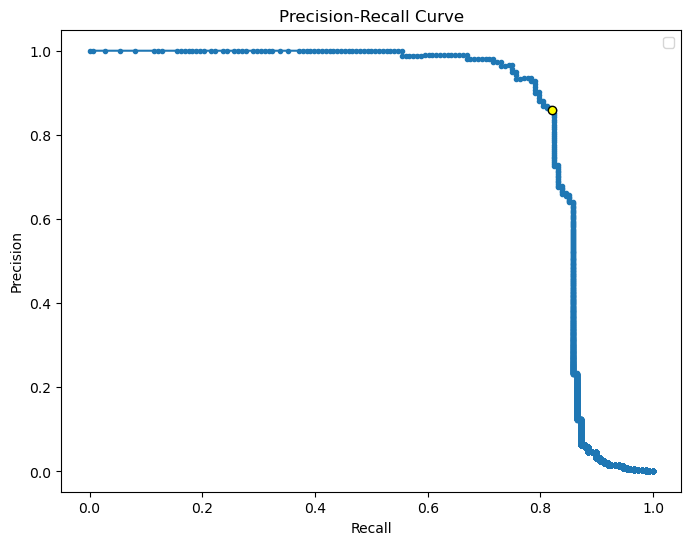

In [22]:
# Plot Precision-Recall Curve showing our chosen threshold that maxmizes F2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, average_precision_score, precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.scatter([0.82], [0.86], c='yellow', edgecolors='black', zorder=2)
plt.plot(recall, precision, marker='.', zorder=1)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()